In [1]:
from pathlib import Path
from typing import Dict, List, Union, Iterable, Tuple  
import json
import pandas as pd
def load_parquet_dict(data_folder: str) -> dict[str, pd.DataFrame]:
    p = Path(data_folder)
    with open(p / "_dtype_book.json", "r", encoding="utf-8") as f:
        book = json.load(f)

    out = {}
    for fp in sorted(p.glob("*.parquet")):
        if fp.name.startswith("_"):
            continue
        name = fp.stem
        df = pd.read_parquet(fp)
        spec = book.get(name)
        if spec:
            df = df.astype(spec)
        else:
            raise Exception(f"{name} in dtype_book.json is {spec}")
        out[name.lower()] = df
    return out

dfs = load_parquet_dict("data/cleaned_result")
dfs

{'assignments':            W6KEY  REVISION         TIMECREATED        TIMEMODIFIED       TASK  \
 0        8340677         4 2022-01-18 11:46:14 2022-01-18 14:50:40        NaN   
 1        8340691         6 2022-01-18 14:49:07 2022-01-19 15:01:06        NaN   
 2        8343748         4 2022-01-25 08:45:51 2022-02-01 13:49:52        NaN   
 3        8344077         4 2022-01-25 08:45:49 2022-02-01 12:21:58        NaN   
 4        8344080         5 2022-01-25 08:45:54 2022-02-01 10:00:12        NaN   
 ...          ...       ...                 ...                 ...        ...   
 5743416  3028307         7 2020-06-23 14:50:25 2020-07-23 11:23:01  3797218.0   
 5743417  3034692         6 2021-06-28 16:03:05 2021-08-18 15:55:18  4178269.0   
 5743418  3052118         8 2020-06-26 08:01:46 2020-08-06 11:38:05  3805222.0   
 5743419  3060903        11 2017-11-08 13:13:27 2018-01-12 13:07:33  2758601.0   
 5743420  3064265         5 2021-07-02 16:06:21 2021-07-13 13:01:48  4184898.0   
 

In [12]:
print(dfs['tasks'].columns.tolist())

['PRIMARY_KEY', 'REVISION', 'CREATEDBY', 'TIMECREATED', 'MODIFIEDBY', 'TIMEMODIFIED', 'CALLID', 'TASKNUMBER', 'EARLYSTART', 'DUEDATE', 'LATESTART', 'PRIORITY', 'STATUSID', 'REGION', 'DISTRICTID', 'POSTCODE', 'OPENDATE', 'TASKTYPEID', 'DURATION', 'NUMBEROFREQUIREDENGINEERS', 'CRITICAL', 'APPOINTMENTSTART', 'APPOINTMENTFINISH', 'CITY', 'TASKSTATUSCONTEXT', 'ISCREWTASK', 'COUNTRYID', 'ISSCHEDULED', 'REQUIREDCREWSIZE', 'INJEOPARDY', 'PINNED', 'JEOPARDYSTATE', 'DISPLAYSTATUS', 'BUSINESSUNIT', 'COMPANY', 'DEPARTMENTID', 'USEGEOCODE', 'SEMPRAPREREQUISITESMET', 'ISLOCKED', 'SEMPRAEMAILSENT', 'DISPLAYDATE', 'SEMPRAINTERRUPTFLAG', 'SEMPRACIRCUITNUMBER', 'SEMPRAORDERDESCRIPTION', 'SEMPRASCHEDULECHANGEREASONCODE', 'SEMPRAEMERGENCY', 'SEMPRALOCATIONMAP1', 'SEMPRALOCATIONMAP2', 'SEMPRAWORKMGMTMODDATE', 'SEMPRAFACILITYID', 'SEMPRASPECIALEQUIPMENTFLAG', 'SEMPRASUSPENDFLAG', 'SEMPRAREFERFLAG', 'SEMPRAMETERBADGENUMBER', 'SEMPRACPSEQUENCENUMBER', 'SEMPRACPFACILITYTYPE', 'SEMPRACOSTCENTER', 'SEMPRAACCOUNT

In [16]:
dfs['tasks']['APPOINTMENTSTART'].value_counts()

APPOINTMENTSTART
2012-05-14 06:48:00    1
2014-03-20 07:44:00    1
Name: count, dtype: int64

In [ ]:
dfs['tasks']['DURATION'] = dfs['tasks']['COMPLETIONTIMESTAMP'] - dfs['tasks']['ONSITETIMESTAMP']

In [21]:
dfs['tasks']['TASKTYPE']

0                           SS10 INSPECTION SDE
1                           SS10 INSPECTION SDE
2                           SS10 INSPECTION SDE
3                           SS10 INSPECTION SDE
4                           SS10 INSPECTION SDE
                           ...                 
5408936                  LEAK INVESTIGATION SCG
5408937                  LEAK INVESTIGATION SCG
5408938                  LEAK INVESTIGATION SCG
5408939    ROUTINE AL RISER MAINTENANCE SCG CPD
5408940               SMALL MSA MAINTENANCE SCG
Name: TASKTYPE, Length: 5408941, dtype: string

In [22]:
dfs['tasks']['DEPARTMENT']

0          SDGE-ELECTRIC
1          SDGE-ELECTRIC
2          SDGE-ELECTRIC
3          SDGE-ELECTRIC
4          SDGE-ELECTRIC
               ...      
5408936          SCG-GAS
5408937          SCG-GAS
5408938          SCG-GAS
5408939          SCG-GAS
5408940          SCG-GAS
Name: DEPARTMENT, Length: 5408941, dtype: string

In [2]:
import dask.dataframe as dd

In [3]:
ddf = dd.from_pandas(dfs['tasks'], npartitions=4)

In [4]:
ddf_gas = ddf[ddf['DEPARTMENT'] == 'SDGE-GAS'].persist()

In [5]:
ddf_gas['DEPARTMENT'].head()

6     SDGE-GAS
9     SDGE-GAS
12    SDGE-GAS
15    SDGE-GAS
20    SDGE-GAS
Name: DEPARTMENT, dtype: string

In [6]:
ddf_gas.to_csv("./data/cleaned_result/GAS_DATA.csv", single_file=True, index=False)

['c:\\Users\\docen\\Desktop\\dsc180a_gas_analysis\\data\\cleaned_result\\GAS_DATA.csv']

In [2]:
import pandas as pd 
df_gas = pd.read_csv('./data/cleaned_result/GAS_DATA.csv')

C:\Users\docen\AppData\Local\Temp\ipykernel_214780\304712635.py:2: DtypeWarning: Columns (15,23,47,53,61,92,97,98,100,102,103,110,122,126,127,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gas = pd.read_csv('./data/cleaned_result/GAS_DATA.csv')


In [3]:
df_gas.head()

,PRIMARY_KEY,REVISION,CREATEDBY,TIMECREATED,MODIFIEDBY,TIMEMODIFIED,CALLID,TASKNUMBER,EARLYSTART,DUEDATE,...,CITY_DISTRICT,POSTCODE_DISTRICT,COMPANY_DISTRICT,USEDINMOBILE_DISTRICT,DATAPREPARATIONAMOUNT,Z_DISTRICT_ABBR,Z_DISTRICT_NAME,Z_DISTRICT_CATEGORY,REVISION_DEPARTMENT,DEPARTMENT
0,4145773,702,Integration,2021-05-26 02:30:02,NETWORK SERVICE,2021-09-19 22:01:56,SAP-PM510000819187,10,2021-07-01 00:00:00,2021-09-30 23:59:00,...,NaN,NaN,NaN,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS
1,4757232,316,Integration,2022-08-26 02:36:16,NETWORK SERVICE,2022-10-12 21:57:16,SAP-PM510000903317,10,2022-10-01 00:00:00,2022-12-31 23:59:00,...,NaN,NaN,NaN,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS
2,4425572,66,Integration,2022-02-24 08:12:08,NETWORK SERVICE,2022-05-04 21:56:46,SAP-PM510000870318,10,2022-02-22 08:06:00,2022-07-31 08:06:00,...,NaN,NaN,NaN,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS
3,4425539,70,Integration,2022-02-24 08:12:01,NETWORK SERVICE,2022-05-05 22:06:35,SAP-PM510000870308,10,2022-02-22 08:03:00,2022-07-31 08:03:00,...,NaN,NaN,NaN,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS
4,4252749,527,Integration,2021-08-26 02:38:19,NETWORK SERVICE,2021-11-19 21:57:37,SAP-PM510000834256,10,2021-10-01 00:00:00,2021-12-31 23:59:00,...,NaN,NaN,NaN,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS


In [4]:
print(df_gas.columns.tolist())

['PRIMARY_KEY', 'REVISION', 'CREATEDBY', 'TIMECREATED', 'MODIFIEDBY', 'TIMEMODIFIED', 'CALLID', 'TASKNUMBER', 'EARLYSTART', 'DUEDATE', 'LATESTART', 'PRIORITY', 'STATUSID', 'REGION', 'DISTRICTID', 'POSTCODE', 'OPENDATE', 'TASKTYPEID', 'DURATION', 'NUMBEROFREQUIREDENGINEERS', 'CRITICAL', 'APPOINTMENTSTART', 'APPOINTMENTFINISH', 'CITY', 'TASKSTATUSCONTEXT', 'ISCREWTASK', 'COUNTRYID', 'ISSCHEDULED', 'REQUIREDCREWSIZE', 'INJEOPARDY', 'PINNED', 'JEOPARDYSTATE', 'DISPLAYSTATUS', 'BUSINESSUNIT', 'COMPANY', 'DEPARTMENTID', 'USEGEOCODE', 'SEMPRAPREREQUISITESMET', 'ISLOCKED', 'SEMPRAEMAILSENT', 'DISPLAYDATE', 'SEMPRAINTERRUPTFLAG', 'SEMPRACIRCUITNUMBER', 'SEMPRAORDERDESCRIPTION', 'SEMPRASCHEDULECHANGEREASONCODE', 'SEMPRAEMERGENCY', 'SEMPRALOCATIONMAP1', 'SEMPRALOCATIONMAP2', 'SEMPRAWORKMGMTMODDATE', 'SEMPRAFACILITYID', 'SEMPRASPECIALEQUIPMENTFLAG', 'SEMPRASUSPENDFLAG', 'SEMPRAREFERFLAG', 'SEMPRAMETERBADGENUMBER', 'SEMPRACPSEQUENCENUMBER', 'SEMPRACPFACILITYTYPE', 'SEMPRACOSTCENTER', 'SEMPRAACCOUNT

In [5]:
df_gas.dtypes

PRIMARY_KEY              int64
REVISION                 int64
CREATEDBY               object
TIMECREATED             object
MODIFIEDBY              object
                        ...   
Z_DISTRICT_ABBR         object
Z_DISTRICT_NAME         object
Z_DISTRICT_CATEGORY     object
REVISION_DEPARTMENT    float64
DEPARTMENT              object
Length: 162, dtype: object

In [6]:
df_gas[['TIMECREATED', 'DURATION', 'DURATION_TASKTYPE', 'DUEDATE', 'SCHEDULEDSTART', 'SCHEDULEDFINISH', 'ONSITETIMESTAMP', 'COMPLETIONTIMESTAMP']]

,TIMECREATED,DURATION,DURATION_TASKTYPE,DUEDATE,SCHEDULEDSTART,SCHEDULEDFINISH,ONSITETIMESTAMP,COMPLETIONTIMESTAMP
0,2021-05-26 02:30:02,1800.0,1800.0,2021-09-30 23:59:00,2021-09-10 06:36:00,2021-09-10 07:06:00,2021-09-10 09:59:58,2021-09-10 10:15:46
1,2022-08-26 02:36:16,1800.0,1800.0,2022-12-31 23:59:00,2022-10-03 14:22:00,2022-10-03 14:52:00,2022-10-03 08:39:17,2022-10-03 08:56:12
2,2022-02-24 08:12:08,1800.0,1800.0,2022-07-31 08:06:00,2022-04-25 08:23:00,2022-04-25 08:53:00,2022-04-25 09:25:49,2022-04-25 09:37:49
3,2022-02-24 08:12:01,1800.0,1800.0,2022-07-31 08:03:00,2022-04-26 06:35:00,2022-04-26 07:12:00,2022-04-26 12:32:59,2022-04-26 13:07:12
4,2021-08-26 02:38:19,1800.0,1800.0,2021-12-31 23:59:00,2021-11-10 07:00:00,2021-11-10 17:26:00,2021-11-10 14:44:34,2021-11-10 15:11:35
...,...,...,...,...,...,...,...,...
338962,2023-03-29 12:03:54,1800.0,1800.0,2023-03-31 23:59:00,2023-03-29 14:28:00,2023-03-29 14:58:00,2023-03-29 12:40:30,2023-03-29 12:57:32
338963,2023-03-30 06:20:01,1800.0,1800.0,2023-03-31 23:59:00,2023-03-30 09:29:00,2023-03-30 09:59:00,2023-03-30 11:57:33,2023-03-30 11:58:25
338964,2023-03-30 06:20:01,1800.0,1800.0,2023-03-31 23:59:00,2023-03-30 11:33:00,2023-03-30 12:03:00,2023-03-30 12:55:54,2023-03-30 13:24:35
338965,2012-02-13 13:09:43,3600.0,0.0,2012-02-28 23:59:00,2012-02-16 11:00:00,2012-02-16 12:00:00,2012-02-16 12:04:56,2012-02-16 14:34:04


In [7]:
df_gas['DURATION'] = df_gas['DURATION'] / 3600

In [8]:
df_gas['DURATION_TASKTYPE'] = df_gas['DURATION_TASKTYPE'] / 3600

In [9]:
df_gas.shape

(338967, 162)

In [10]:
df_gas['TASKTYPE']

0                       LEAK SURVEY SDG
1                       LEAK SURVEY SDG
2         LEAK SURVEY PUBLIC SAFETY SDG
3         LEAK SURVEY PUBLIC SAFETY SDG
4                       LEAK SURVEY SDG
                      ...              
338962       ODORANT INTENSITY TEST SDG
338963       ODORANT INTENSITY TEST SDG
338964       ODORANT INTENSITY TEST SDG
338965                UG FIELD MEMO SDG
338966            GAS SERVICE ORDER SDG
Name: TASKTYPE, Length: 338967, dtype: object

In [11]:
data = df_gas.groupby('TASKTYPE')['DURATION'].mean().reset_index().sort_values(by='DURATION', ascending=False).head(10)

# Duration by Work Type

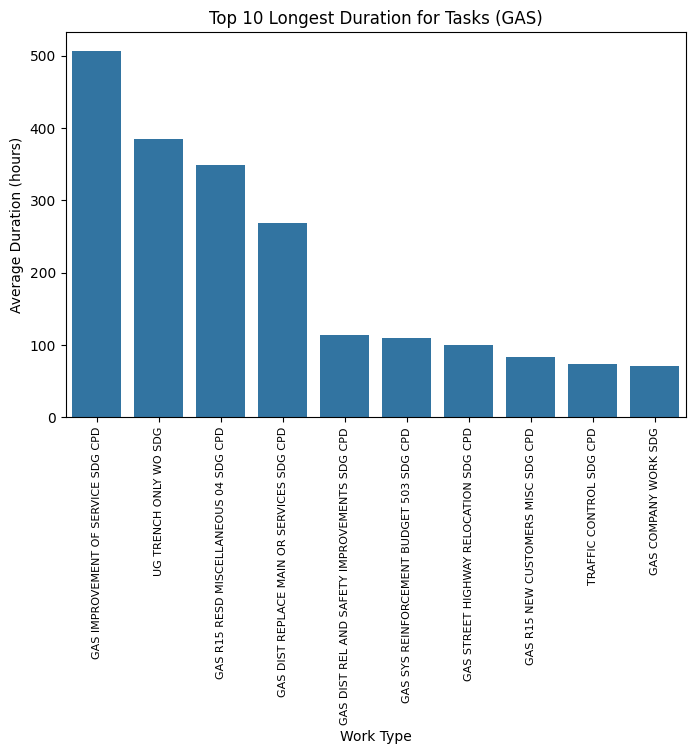

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='TASKTYPE', y='DURATION')
plt.title("Top 10 Longest Duration for Tasks (GAS)")
plt.ylabel("Average Duration (hours)")
plt.xlabel("Work Type")
plt.xticks(fontsize=8, rotation=90)
plt.show()

In [13]:
df_gas['DURATION'].dtype

dtype('float64')

In [36]:
def mark_outliers(group):
    Q1 = group['DURATION'].quantile(0.25)
    Q3 = group['DURATION'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    group['FAST_COMPLETION'] = group['DURATION'] < lower
    group['SLOW_COMPLETION'] = group['DURATION'] > upper
    group['is_outlier'] = (group['DURATION'] < lower) | (group['DURATION'] > upper)
    return group

df_gas_group = df_gas.groupby('TASKTYPE', group_keys=False).apply(mark_outliers)


C:\Users\docen\AppData\Local\Temp\ipykernel_214780\2459165116.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_gas_group = df_gas.groupby('TASKTYPE', group_keys=False).apply(mark_outliers)


In [37]:
df_fast = df_gas_group[df_gas_group['FAST_COMPLETION']]
df_fast.head()

,PRIMARY_KEY,REVISION,CREATEDBY,TIMECREATED,MODIFIEDBY,TIMEMODIFIED,CALLID,TASKNUMBER,EARLYSTART,DUEDATE,...,USEDINMOBILE_DISTRICT,DATAPREPARATIONAMOUNT,Z_DISTRICT_ABBR,Z_DISTRICT_NAME,Z_DISTRICT_CATEGORY,REVISION_DEPARTMENT,DEPARTMENT,FAST_COMPLETION,SLOW_COMPLETION,is_outlier
2,4425572,66,Integration,2022-02-24 08:12:08,NETWORK SERVICE,2022-05-04 21:56:46,SAP-PM510000870318,10,2022-02-22 08:06:00,2022-07-31 08:06:00,...,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS,True,False,True
3,4425539,70,Integration,2022-02-24 08:12:01,NETWORK SERVICE,2022-05-05 22:06:35,SAP-PM510000870308,10,2022-02-22 08:03:00,2022-07-31 08:03:00,...,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS,True,False,True
5,4422392,66,Integration,2022-02-23 20:56:29,NETWORK SERVICE,2022-05-04 21:56:49,SAP-PM510000870071,10,2022-02-22 20:53:00,2022-07-31 20:53:00,...,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS,True,False,True
15,4422378,66,Integration,2022-02-23 21:23:28,NETWORK SERVICE,2022-05-04 21:56:41,SAP-PM510000870104,10,2022-02-22 21:16:00,2022-07-31 21:16:00,...,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS,True,False,True
22,4425585,73,Integration,2022-02-24 08:19:07,NETWORK SERVICE,2022-05-05 22:06:39,SAP-PM510000870335,10,2022-02-22 08:10:00,2022-07-31 08:10:00,...,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS,True,False,True


In [38]:
df_fast = df_fast.groupby('TASKTYPE')['DURATION'].mean().reset_index().sort_values(by='DURATION')

In [50]:
df_slow = df_gas_group[df_gas_group['SLOW_COMPLETION']]

In [51]:
df_slow = df_slow.groupby('TASKTYPE')['DURATION'].mean().reset_index().sort_values(by='DURATION')

In [52]:
df_tasks_duration = df_gas_group.groupby('TASKTYPE')['DURATION'].mean().reset_index()

In [53]:
df_tasks_duration = df_tasks_duration.merge(df_fast, how='left', on='TASKTYPE')

In [54]:
df_tasks_duration = df_tasks_duration.merge(df_slow, how='left', on='TASKTYPE')

In [70]:
df_tasks_duration.rename(columns={'DURATION_x': 'ACTUAL_DURATION (HOURS)', 'DURATION_y': 'FAST_COMPLETION (HOURS)', 'DURATION': 'SLOW_COMPLETION (HOURS)'}, inplace=True)

In [71]:
df_non_outliers = df_gas_group[~df_gas_group['is_outlier']]

In [72]:
df_gas_nonoutliers = df_non_outliers.groupby('TASKTYPE')['DURATION'].mean().reset_index()

In [65]:
df_gas_nonoutliers

TASKTYPE
100512X GAS MAIN DETERIORATION CAPITAL SDG CPD      1.000000
ACOR INSPECTION IN VAULT SDG                        0.500000
ACOR INSPECTION SDG                                20.846745
BARRIER POST SDG                                    2.388075
BRIDGE AND SPAN INSPECTION SDG                      1.000000
                                                     ...    
UG SVC R20SD CONV SRCHG CI SDE CPD                  1.386667
UG TRENCH ONLY WO SDG                             266.484762
UNSTABLE EARTH INSPECTION SDG                       1.000000
USA MARKOUT REMOVAL SDG                             1.355769
VALVE BOX SDG                                       4.158267
Name: DURATION, Length: 231, dtype: float64

In [73]:
df_gas_nonoutliers

,TASKTYPE,DURATION
0,100512X GAS MAIN DETERIORATION CAPITAL SDG CPD,1.000000
1,ACOR INSPECTION IN VAULT SDG,0.500000
2,ACOR INSPECTION SDG,20.846745
3,BARRIER POST SDG,2.388075
4,BRIDGE AND SPAN INSPECTION SDG,1.000000
...,...,...
226,UG SVC R20SD CONV SRCHG CI SDE CPD,1.386667
227,UG TRENCH ONLY WO SDG,266.484762
228,UNSTABLE EARTH INSPECTION SDG,1.000000
229,USA MARKOUT REMOVAL SDG,1.355769


In [74]:
df_tasks_duration

,TASKTYPE,ACTUAL_DURATION (HOURS),FAST_COMPLETION (HOURS),SLOW_COMPLETION (HOURS)
0,100512X GAS MAIN DETERIORATION CAPITAL SDG CPD,1.591873,NaN,12.586364
1,ACOR INSPECTION IN VAULT SDG,0.607112,NaN,7.361111
2,ACOR INSPECTION SDG,22.691470,NaN,108.437037
3,BARRIER POST SDG,2.500138,0.333333,6.636364
4,BRIDGE AND SPAN INSPECTION SDG,0.999064,0.500000,1.500000
...,...,...,...,...
226,UG SVC R20SD CONV SRCHG CI SDE CPD,2.749396,NaN,20.580851
227,UG TRENCH ONLY WO SDG,385.104203,NaN,1630.608333
228,UNSTABLE EARTH INSPECTION SDG,1.041667,0.500000,4.764706
229,USA MARKOUT REMOVAL SDG,1.443396,NaN,6.000000


In [75]:
df = df_tasks_duration.merge(df_gas_nonoutliers, how='left', on='TASKTYPE')

In [76]:
df.head()

,TASKTYPE,ACTUAL_DURATION (HOURS),FAST_COMPLETION (HOURS),SLOW_COMPLETION (HOURS),DURATION
0,100512X GAS MAIN DETERIORATION CAPITAL SDG CPD,1.591873,NaN,12.586364,1.000000
1,ACOR INSPECTION IN VAULT SDG,0.607112,NaN,7.361111,0.500000
2,ACOR INSPECTION SDG,22.691470,NaN,108.437037,20.846745
3,BARRIER POST SDG,2.500138,0.333333,6.636364,2.388075
4,BRIDGE AND SPAN INSPECTION SDG,0.999064,0.500000,1.500000,1.000000


In [49]:
df.head()

,TASKTYPE,ACTUAL_DURATION (HOURS),FAST_COMPLETION (HOURS),DURATION_NO_OUTLIERS (HOURS)
0,100512X GAS MAIN DETERIORATION CAPITAL SDG CPD,1.591873,NaN,1.000000
1,ACOR INSPECTION IN VAULT SDG,0.607112,NaN,0.500000
2,ACOR INSPECTION SDG,22.691470,NaN,20.846745
3,BARRIER POST SDG,2.500138,0.333333,2.388075
4,BRIDGE AND SPAN INSPECTION SDG,0.999064,0.500000,1.000000


In [77]:
df.rename(columns={'DURATION': 'DURATION_NO_OUTLIERS (HOURS)'}, inplace=True)

In [78]:
df.head()

,TASKTYPE,ACTUAL_DURATION (HOURS),FAST_COMPLETION (HOURS),SLOW_COMPLETION (HOURS),DURATION_NO_OUTLIERS (HOURS)
0,100512X GAS MAIN DETERIORATION CAPITAL SDG CPD,1.591873,NaN,12.586364,1.000000
1,ACOR INSPECTION IN VAULT SDG,0.607112,NaN,7.361111,0.500000
2,ACOR INSPECTION SDG,22.691470,NaN,108.437037,20.846745
3,BARRIER POST SDG,2.500138,0.333333,6.636364,2.388075
4,BRIDGE AND SPAN INSPECTION SDG,0.999064,0.500000,1.500000,1.000000


In [79]:
df_hours = df.sort_values(by='ACTUAL_DURATION (HOURS)', ascending=False).head(20)
df_hours

,TASKTYPE,ACTUAL_DURATION (HOURS),FAST_COMPLETION (HOURS),SLOW_COMPLETION (HOURS),DURATION_NO_OUTLIERS (HOURS)
76,GAS IMPROVEMENT OF SERVICE SDG CPD,507.016384,NaN,2593.179412,237.322305
227,UG TRENCH ONLY WO SDG,385.104203,NaN,1630.608333,266.484762
96,GAS R15 RESD MISCELLANEOUS 04 SDG CPD,348.750000,NaN,NaN,348.750000
69,GAS DIST REPLACE MAIN OR SERVICES SDG CPD,269.125207,NaN,1305.433333,80.705547
68,GAS DIST REL AND SAFETY IMPROVEMENTS SDG CPD,113.190323,NaN,438.950000,90.724138
114,GAS SYS REINFORCEMENT BUDGET 503 SDG CPD,109.380556,NaN,NaN,109.380556
109,GAS STREET HIGHWAY RELOCATION SDG CPD,100.240102,NaN,556.606667,39.660470
94,GAS R15 NEW CUSTOMERS MISC SDG CPD,83.142593,NaN,258.050000,33.169048
209,TRAFFIC CONTROL SDG CPD,73.301349,NaN,470.339105,26.283720
60,GAS COMPANY WORK SDG,71.003055,NaN,356.450562,20.305814


In [28]:
df_gas[df_gas['TASKTYPE'] == 'GAS IMPROVEMENT OF SERVICE SDG CPD']['DURATION_TASKTYPE']

14779     0.5
15777     0.5
30556     0.5
30562     0.5
30596     0.5
         ... 
332219    0.5
332234    0.5
332265    0.5
332275    0.5
338329    0.5
Name: DURATION_TASKTYPE, Length: 297, dtype: float64

In [31]:
df_gaming = df[~df['FAST_COMPLETION (HOURS)'].isna()].sort_values(by='FAST_COMPLETION (HOURS)').head(10)

In [32]:
df_gaming

,TASKTYPE,ACTUAL_DURATION (HOURS),FAST_COMPLETION (HOURS),DURATION_NO_OUTLIERS (HOURS)
175,PIPELINE PATROL SDG,1.273051,0.200000,1.273848
119,LARGE MSA INSPECTION SDG,1.308778,0.300000,0.826552
150,MISC PIPELINE VALVE INSPECTION SDG,0.801841,0.300000,0.500000
3,BARRIER POST SDG,2.500138,0.333333,2.388075
104,GAS RULE 16 GAS RELOCATION SDG CPD,3.621604,0.434091,3.285674
55,GAS 100612X LEAK INV AND REP SDG CPD,0.929286,0.499672,1.000000
58,GAS 100625X RISER REPL AND ACOR SDG CPD,1.006550,0.500000,1.000000
57,GAS 100619X SERV REM AND RETIREMENTS SDG CPD,0.909836,0.500000,1.000000
74,GAS GD G533 SDG CPD,1.208591,0.500000,1.000000
108,GAS SPECIFIC WO MAIN RFS SDG CPD,0.938406,0.500000,1.000000


# Potential Gaming

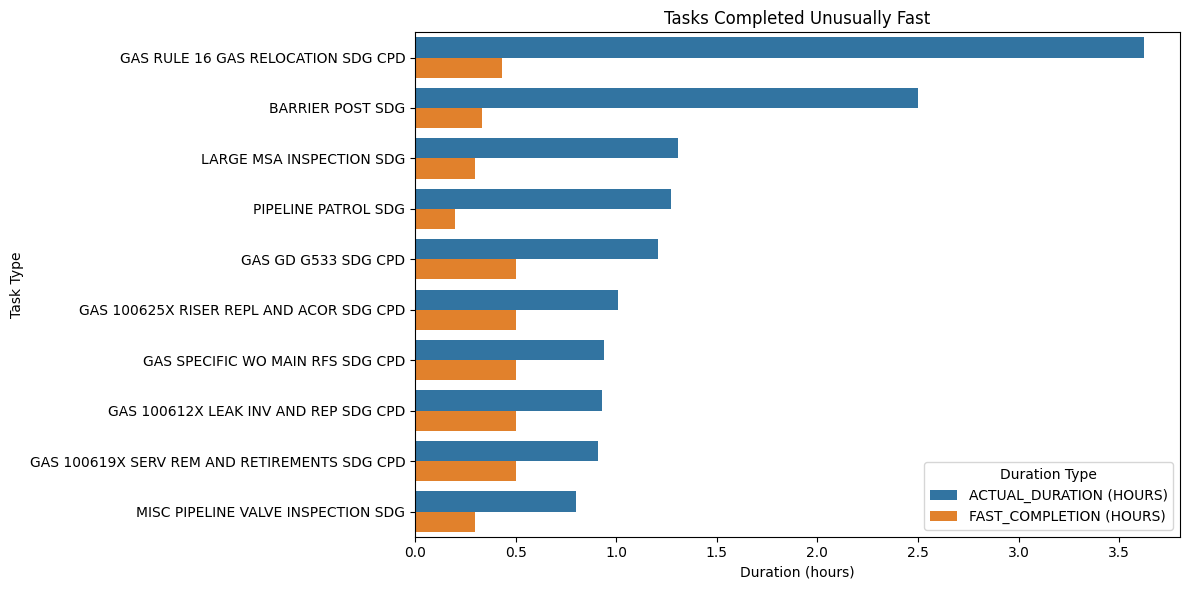

In [82]:
df_melt = df_gaming.sort_values(by='ACTUAL_DURATION (HOURS)', ascending=False).melt(id_vars='TASKTYPE', value_vars=['ACTUAL_DURATION (HOURS)', 'FAST_COMPLETION (HOURS)'],
                  var_name='Type', value_name='Duration (hrs)')

plt.figure(figsize=(12,6))
sns.barplot(x='Duration (hrs)', y='TASKTYPE', hue='Type', data=df_melt, orient='h')
plt.title("Tasks Completed Unusually Fast")
plt.xlabel("Duration (hours)")
plt.ylabel("Task Type")
plt.legend(title="Duration Type")
plt.tight_layout()
plt.show()

In [83]:
df_gas_group.head()

,PRIMARY_KEY,REVISION,CREATEDBY,TIMECREATED,MODIFIEDBY,TIMEMODIFIED,CALLID,TASKNUMBER,EARLYSTART,DUEDATE,...,USEDINMOBILE_DISTRICT,DATAPREPARATIONAMOUNT,Z_DISTRICT_ABBR,Z_DISTRICT_NAME,Z_DISTRICT_CATEGORY,REVISION_DEPARTMENT,DEPARTMENT,FAST_COMPLETION,SLOW_COMPLETION,is_outlier
0,4145773,702,Integration,2021-05-26 02:30:02,NETWORK SERVICE,2021-09-19 22:01:56,SAP-PM510000819187,10,2021-07-01 00:00:00,2021-09-30 23:59:00,...,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS,False,False,False
1,4757232,316,Integration,2022-08-26 02:36:16,NETWORK SERVICE,2022-10-12 21:57:16,SAP-PM510000903317,10,2022-10-01 00:00:00,2022-12-31 23:59:00,...,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS,False,False,False
2,4425572,66,Integration,2022-02-24 08:12:08,NETWORK SERVICE,2022-05-04 21:56:46,SAP-PM510000870318,10,2022-02-22 08:06:00,2022-07-31 08:06:00,...,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS,True,False,True
3,4425539,70,Integration,2022-02-24 08:12:01,NETWORK SERVICE,2022-05-05 22:06:35,SAP-PM510000870308,10,2022-02-22 08:03:00,2022-07-31 08:03:00,...,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS,True,False,True
4,4252749,527,Integration,2021-08-26 02:38:19,NETWORK SERVICE,2021-11-19 21:57:37,SAP-PM510000834256,10,2021-10-01 00:00:00,2021-12-31 23:59:00,...,0.0,0.0,XX,XX,OTHER,2.0,SDGE-GAS,False,False,False


In [97]:
df_no_slow = df_gas_group[~df_gas_group['SLOW_COMPLETION']]

In [98]:
df_no_slow = df_no_slow.groupby('TASKTYPE')['DURATION'].mean().reset_index()

In [99]:
df_no_slow

,TASKTYPE,DURATION
0,100512X GAS MAIN DETERIORATION CAPITAL SDG CPD,1.000000
1,ACOR INSPECTION IN VAULT SDG,0.500000
2,ACOR INSPECTION SDG,20.846745
3,BARRIER POST SDG,2.370513
4,BRIDGE AND SPAN INSPECTION SDG,0.998594
...,...,...
226,UG SVC R20SD CONV SRCHG CI SDE CPD,1.386667
227,UG TRENCH ONLY WO SDG,266.484762
228,UNSTABLE EARTH INSPECTION SDG,0.996426
229,USA MARKOUT REMOVAL SDG,1.355769


In [100]:
df_no_slow = df_hours.merge(df_no_slow, how='left', on='TASKTYPE')

In [101]:
df_no_slow.rename(columns={'DURATION': 'DURATION_NO_SLOW (HOURS)'}, inplace=True)

In [108]:
df_no_slow

,TASKTYPE,ACTUAL_DURATION (HOURS),FAST_COMPLETION (HOURS),SLOW_COMPLETION (HOURS),DURATION_NO_OUTLIERS (HOURS),DURATION_NO_SLOW (HOURS)
2,GAS R15 RESD MISCELLANEOUS 04 SDG CPD,348.750000,NaN,NaN,348.750000,348.750000
1,UG TRENCH ONLY WO SDG,385.104203,NaN,1630.608333,266.484762,266.484762
0,GAS IMPROVEMENT OF SERVICE SDG CPD,507.016384,NaN,2593.179412,237.322305,237.322305
5,GAS SYS REINFORCEMENT BUDGET 503 SDG CPD,109.380556,NaN,NaN,109.380556,109.380556
4,GAS DIST REL AND SAFETY IMPROVEMENTS SDG CPD,113.190323,NaN,438.950000,90.724138,90.724138
3,GAS DIST REPLACE MAIN OR SERVICES SDG CPD,269.125207,NaN,1305.433333,80.705547,80.705547
14,R16 RESD AND NON RESD UD SDE CPD,52.880000,NaN,NaN,52.880000,52.880000
15,UG ELEC DIST R20A CONV SDE CPD,49.200000,NaN,NaN,49.200000,49.200000
17,ELS LEAK SURVEY OR ACOR SDG,44.065883,NaN,NaN,44.065883,44.065883
6,GAS STREET HIGHWAY RELOCATION SDG CPD,100.240102,NaN,556.606667,39.660470,39.660470


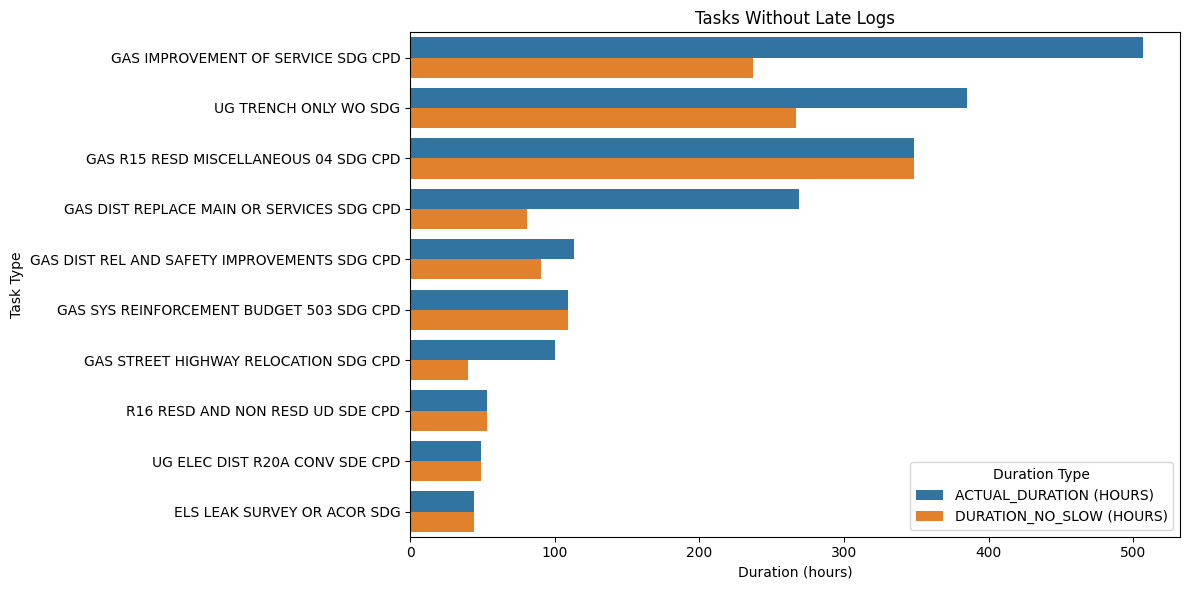

In [115]:
df_melt = df_no_slow.sort_values(by='ACTUAL_DURATION (HOURS)', ascending=False).melt(id_vars='TASKTYPE', value_vars=['ACTUAL_DURATION (HOURS)', 'DURATION_NO_SLOW (HOURS)'],
                  var_name='Type', value_name='Duration (hrs)')

plt.figure(figsize=(12,6))
sns.barplot(x='Duration (hrs)', y='TASKTYPE', hue='Type', data=df_melt, orient='h')
plt.title("Tasks Without Late Logs")
plt.xlabel("Duration (hours)")
plt.ylabel("Task Type")
plt.legend(title="Duration Type")
plt.tight_layout()
plt.show()

# Impact on Actual Duration / Expected Duration

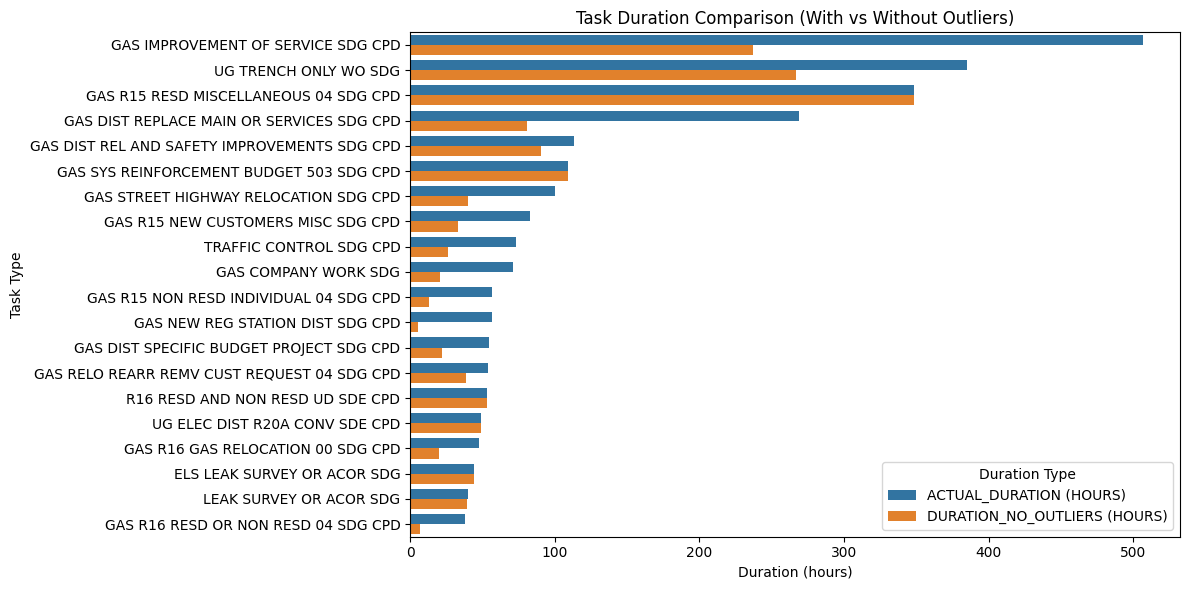

In [294]:
df_melt = df_hours.melt(id_vars='TASKTYPE', value_vars=['ACTUAL_DURATION (HOURS)', 'DURATION_NO_OUTLIERS (HOURS)'],
                  var_name='Type', value_name='Duration (hrs)')

plt.figure(figsize=(12,6))
sns.barplot(x='Duration (hrs)', y='TASKTYPE', hue='Type', data=df_melt, orient='h')
plt.title("Task Duration Comparison (With vs Without Outliers)")
plt.xlabel("Duration (hours)")
plt.ylabel("Task Type")
plt.legend(title="Duration Type")
plt.tight_layout()
plt.show()

In [132]:
# Percentage of amount of outliers in tasks
df_gas_group.groupby('TASKTYPE')['is_outlier'].mean().sort_values(ascending=False)

TASKTYPE
REML PRTN POLE RPLMNT CMP SDE CPD    0.444444
EC CALIBRATION SDG                   0.395642
LEAK SURVEY PUBLIC SAFETY SDG        0.375569
OH R20A CONVERSION SDG               0.375000
UG CUST NEW BUSINESS SDG             0.322034
                                       ...   
UG MASTER SERVICE SDG                0.000000
UG ED RESTORE SEC OUTAGE SDE CPD     0.000000
UG ELEC SVC DISCON RECON SDE CPD     0.000000
UG ELEC DIST R20A CONV SDE CPD       0.000000
UG ELEC MISC SVC US SDE CPD          0.000000
Name: is_outlier, Length: 231, dtype: float64

In [143]:
summary = (
    df_gas_group.groupby('is_outlier')
      .agg({
          'DURATION': ['mean', 'median', 'count'],
          'NUMBEROFREQUIREDENGINEERS': 'mean',
          'REQUIREDCREWSIZE': 'mean',
          'SEMPRAEMERGENCY': 'mean',
          'REGION': pd.Series.nunique,
          'TASKTYPE': pd.Series.nunique
      })
)

print(summary.to_dict())

{('DURATION', 'mean'): {False: 2.5892582506401394, True: 16.39224532442327}, ('DURATION', 'median'): {False: 1.0, True: 3.0}, ('DURATION', 'count'): {False: 313777, True: 25190}, ('NUMBEROFREQUIREDENGINEERS', 'mean'): {False: 1.0, True: 1.0}, ('REQUIREDCREWSIZE', 'mean'): {False: 1.4262422038581541, True: 1.6562524811433108}, ('SEMPRAEMERGENCY', 'mean'): {False: 0.0, True: 0.0}, ('REGION', 'nunique'): {False: 5, True: 4}, ('TASKTYPE', 'nunique'): {False: 231, True: 142}}


In [182]:
df_gas_group[df_gas_group['TASKTYPE'] == 'REML PRTN POLE RPLMNT CMP SDE CPD'].iloc[:10, :10]

,PRIMARY_KEY,REVISION,CREATEDBY,TIMECREATED,MODIFIEDBY,TIMEMODIFIED,CALLID,TASKNUMBER,EARLYSTART,DUEDATE
31152,2650033,496,Integration,2017-07-13 09:58:46,NETWORK SERVICE,2017-09-15 21:58:23,CPD_WO530000060512,8,2017-02-01 12:40:00,2017-02-28 20:58:00
107868,5598416,7451,Integration,2023-08-14 14:55:09,NETWORK SERVICE,2024-09-29 18:01:40,CPD_WO530000306879,7,2023-01-01 12:55:00,2023-09-30 22:01:00
114917,1912494,5130,Integration,2015-11-10 14:31:10,NETWORK SERVICE,2016-08-05 20:42:04,CPD_WO530000034725,7,2015-12-01,2015-12-31 12:00:00
115099,2120178,988,Integration,2016-04-12 15:00:19,NETWORK SERVICE,2016-08-05 20:47:48,CPD_WO530000043857,9,2016-05-01,2016-05-31 09:18:00
118537,2230125,54,Integration,2016-06-22 15:39:25,NETWORK SERVICE,2016-08-05 20:50:13,CPD_WO530000037336,9,2015-11-12 08:36:00,2015-12-31 19:12:00
118561,2967477,293,Integration,2018-04-24 13:05:12,NETWORK SERVICE,2018-06-02 21:56:02,CPD_WO530000102829,8,2018-08-01 11:01:00,2018-08-31 19:19:00
118582,3730689,74,Integration,2020-04-20 12:30:03,NETWORK SERVICE,2020-05-27 21:59:57,CPD_WO530000112720,6,2018-05-01 12:57:00,2018-05-31 20:48:00
118669,2248491,3431,Integration,2016-07-12 15:28:10,CORP\KMcKenzi,2017-04-26 10:27:15,CPD_WO530000054281,9,2016-07-12 07:23:00,2016-11-30 18:41:00
136436,2192289,1396,Integration,2016-05-11 13:23:14,NETWORK SERVICE,2016-08-05 20:48:44,CPD_WO530000043499,6,2016-05-01,2016-05-31 05:18:00
136461,2120180,2997,Integration,2016-04-12 15:04:17,NETWORK SERVICE,2016-09-02 18:30:37,CPD_WO530000044235,7,2016-05-01,2016-05-31 06:18:00


In [146]:
df_planned = df_gas_group.copy()

In [147]:
df_planned['TIME_DIFFERENCE'] = df_planned['DURATION'] - df_planned['DURATION_TASKTYPE']

In [148]:
df_planned['TIME_DIFFERENCE']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
338962    0.0
338963    0.0
338964    0.0
338965    1.0
338966    2.5
Name: TIME_DIFFERENCE, Length: 338967, dtype: float64

In [ ]:
df_planned = df_planned.groupby('TASKTYPE')['TIME_DIFFERENCE'].sum().reset_index().sort_values(by='TIME_DIFFERENCE', ascending=False).head(10)

# Tasks With Largest Difference Between Actual and Expected Duration

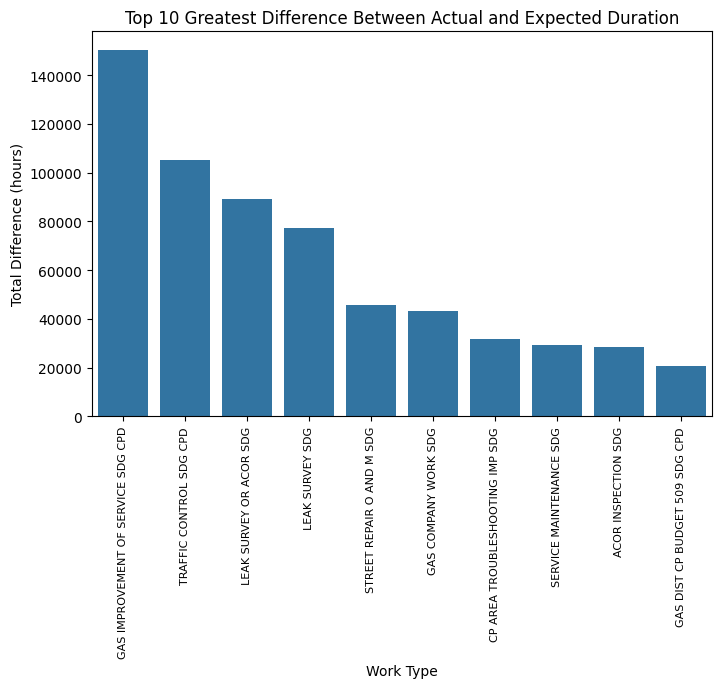

In [154]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_planned, x='TASKTYPE', y='TIME_DIFFERENCE')
plt.title("Top 10 Greatest Difference Between Actual and Expected Duration")
plt.ylabel("Total Difference (hours)")
plt.xlabel("Work Type")
plt.xticks(fontsize=8, rotation=90)
plt.show()

In [156]:
print(df_gas_group.columns.tolist())

['PRIMARY_KEY', 'REVISION', 'CREATEDBY', 'TIMECREATED', 'MODIFIEDBY', 'TIMEMODIFIED', 'CALLID', 'TASKNUMBER', 'EARLYSTART', 'DUEDATE', 'LATESTART', 'PRIORITY', 'STATUSID', 'REGION', 'DISTRICTID', 'POSTCODE', 'OPENDATE', 'TASKTYPEID', 'DURATION', 'NUMBEROFREQUIREDENGINEERS', 'CRITICAL', 'APPOINTMENTSTART', 'APPOINTMENTFINISH', 'CITY', 'TASKSTATUSCONTEXT', 'ISCREWTASK', 'COUNTRYID', 'ISSCHEDULED', 'REQUIREDCREWSIZE', 'INJEOPARDY', 'PINNED', 'JEOPARDYSTATE', 'DISPLAYSTATUS', 'BUSINESSUNIT', 'COMPANY', 'DEPARTMENTID', 'USEGEOCODE', 'SEMPRAPREREQUISITESMET', 'ISLOCKED', 'SEMPRAEMAILSENT', 'DISPLAYDATE', 'SEMPRAINTERRUPTFLAG', 'SEMPRACIRCUITNUMBER', 'SEMPRAORDERDESCRIPTION', 'SEMPRASCHEDULECHANGEREASONCODE', 'SEMPRAEMERGENCY', 'SEMPRALOCATIONMAP1', 'SEMPRALOCATIONMAP2', 'SEMPRAWORKMGMTMODDATE', 'SEMPRAFACILITYID', 'SEMPRASPECIALEQUIPMENTFLAG', 'SEMPRASUSPENDFLAG', 'SEMPRAREFERFLAG', 'SEMPRAMETERBADGENUMBER', 'SEMPRACPSEQUENCENUMBER', 'SEMPRACPFACILITYTYPE', 'SEMPRACOSTCENTER', 'SEMPRAACCOUNT

In [157]:
df_gas_group[[ 'CREATEDBY', 'TIMECREATED', 'MODIFIEDBY', 'TIMEMODIFIED','EARLYSTART', 'DUEDATE', 'LATESTART', 'SCHEDULEDSTART', 'SCHEDULEDFINISH', 'ONSITETIMESTAMP', 'COMPLETIONTIMESTAMP']]

,CREATEDBY,TIMECREATED,MODIFIEDBY,TIMEMODIFIED,EARLYSTART,DUEDATE,LATESTART,SCHEDULEDSTART,SCHEDULEDFINISH,ONSITETIMESTAMP,COMPLETIONTIMESTAMP
0,Integration,2021-05-26 02:30:02,NETWORK SERVICE,2021-09-19 22:01:56,2021-07-01 00:00:00,2021-09-30 23:59:00,2021-09-30 23:29:00,2021-09-10 06:36:00,2021-09-10 07:06:00,2021-09-10 09:59:58,2021-09-10 10:15:46
1,Integration,2022-08-26 02:36:16,NETWORK SERVICE,2022-10-12 21:57:16,2022-10-01 00:00:00,2022-12-31 23:59:00,2022-12-31 23:29:00,2022-10-03 14:22:00,2022-10-03 14:52:00,2022-10-03 08:39:17,2022-10-03 08:56:12
2,Integration,2022-02-24 08:12:08,NETWORK SERVICE,2022-05-04 21:56:46,2022-02-22 08:06:00,2022-07-31 08:06:00,2022-07-31 07:36:00,2022-04-25 08:23:00,2022-04-25 08:53:00,2022-04-25 09:25:49,2022-04-25 09:37:49
3,Integration,2022-02-24 08:12:01,NETWORK SERVICE,2022-05-05 22:06:35,2022-02-22 08:03:00,2022-07-31 08:03:00,2022-07-31 07:33:00,2022-04-26 06:35:00,2022-04-26 07:12:00,2022-04-26 12:32:59,2022-04-26 13:07:12
4,Integration,2021-08-26 02:38:19,NETWORK SERVICE,2021-11-19 21:57:37,2021-10-01 00:00:00,2021-12-31 23:59:00,2021-12-31 23:29:00,2021-11-10 07:00:00,2021-11-10 17:26:00,2021-11-10 14:44:34,2021-11-10 15:11:35
...,...,...,...,...,...,...,...,...,...,...,...
338962,Integration,2023-03-29 12:03:54,NETWORK SERVICE,2023-04-07 22:08:58,2023-03-27 00:00:00,2023-03-31 23:59:00,2023-03-31 23:29:00,2023-03-29 14:28:00,2023-03-29 14:58:00,2023-03-29 12:40:30,2023-03-29 12:57:32
338963,Integration,2023-03-30 06:20:01,NETWORK SERVICE,2023-04-08 21:53:51,2023-03-27 00:00:00,2023-03-31 23:59:00,2023-03-31 23:29:00,2023-03-30 09:29:00,2023-03-30 09:59:00,2023-03-30 11:57:33,2023-03-30 11:58:25
338964,Integration,2023-03-30 06:20:01,NETWORK SERVICE,2023-04-08 21:53:50,2023-03-27 00:00:00,2023-03-31 23:59:00,2023-03-31 23:29:00,2023-03-30 11:33:00,2023-03-30 12:03:00,2023-03-30 12:55:54,2023-03-30 13:24:35
338965,DPSS,2012-02-13 13:09:43,CORP\SV-FSDINT-P,2016-03-04 17:20:05,2012-02-01 00:01:00,2012-02-28 23:59:00,2012-02-28 23:29:00,2012-02-16 11:00:00,2012-02-16 12:00:00,2012-02-16 12:04:56,2012-02-16 14:34:04


In [159]:
df_gas_group['SCHEDULEDSTART'] = pd.to_datetime(df_gas_group['SCHEDULEDSTART'], errors='coerce')

In [160]:
df_gas_group['YEAR_MONTH'] = df_gas_group['SCHEDULEDSTART'].dt.to_period('M').astype(str)

In [167]:
tasks_per_month = (
    df_gas_group.groupby('YEAR_MONTH')
      .size()
      .reset_index(name='task_count')
      .sort_values('YEAR_MONTH')
)

In [168]:
tasks_per_month['YEAR_MONTH'] = pd.to_datetime(tasks_per_month['YEAR_MONTH'])


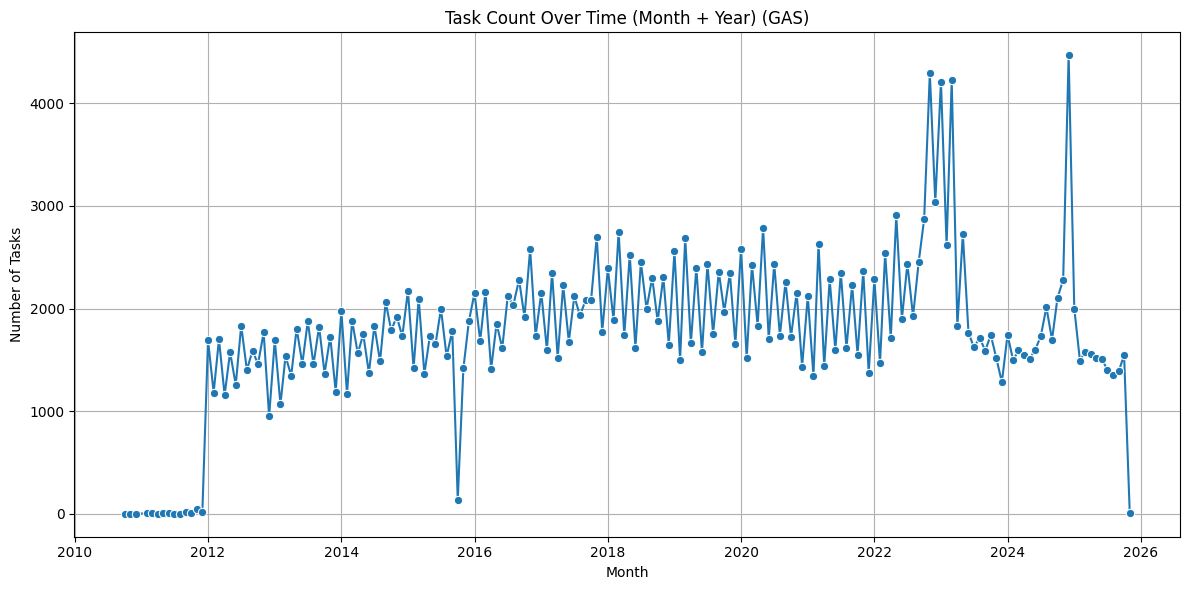

In [170]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=tasks_per_month,
    x='YEAR_MONTH',
    y='task_count',
    marker='o'
)
plt.title('Task Count Over Time (Month + Year) (GAS)')
plt.xlabel('Month')
plt.ylabel('Number of Tasks')
plt.grid(True)
plt.tight_layout()
plt.show()

In [171]:
df_gas_group['year'] = df_gas_group['SCHEDULEDSTART'].dt.year
df_gas_group['month'] = df_gas_group['SCHEDULEDSTART'].dt.month_name()

In [172]:
heatmap_data = (
    df_gas_group.groupby(['year', 'month'])
      .size()
      .reset_index(name='task_count')
)


In [173]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [174]:
heatmap_data['month'] = pd.Categorical(heatmap_data['month'], categories=month_order, ordered=True)

In [175]:
pivot_table = heatmap_data.pivot(index='month', columns='year', values='task_count')


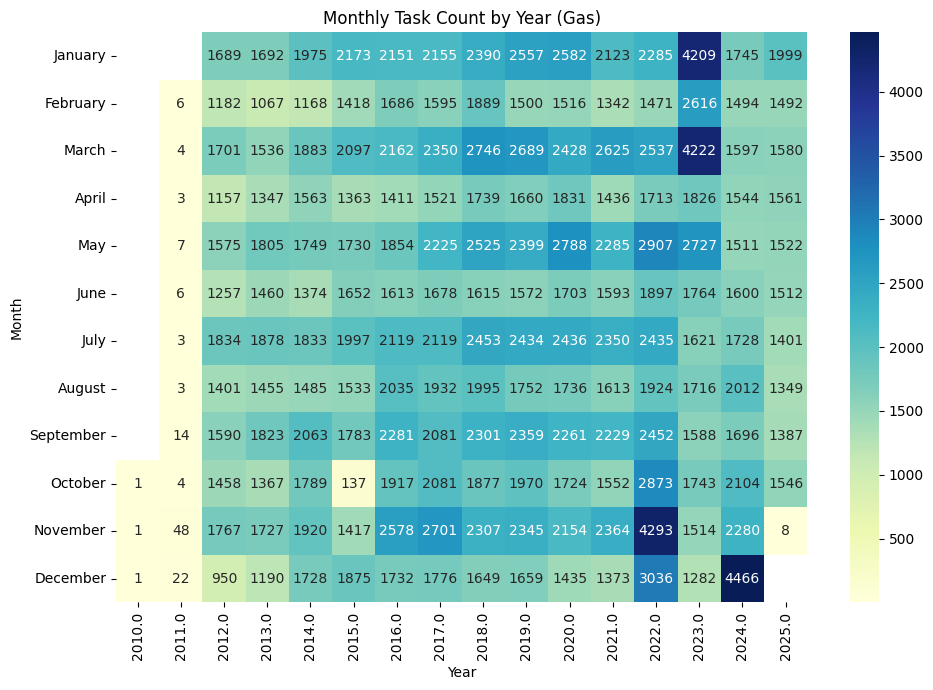

In [177]:
# Plot
plt.figure(figsize=(10,7))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Task Count by Year (Gas)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.tight_layout()
plt.show()